# Wine Quality Project

### Index
1.  [Exploratory Data Analysis](#1)<br>
2.  [Feature Selection](#2)<br>
3.  [Scaling, Preprocessing, Train-Test Split](#3)<br>
4.  [Model 1: Logistic Regression](#4)<br>
5.  [Model 2: Decision Trees](#5)<br>
6.  [Model 3: Random Forests](#6)<br>
7.  [Model 4: Gradient Boosting](#7)<br>
8.  [Model 5: k-Nearest Neighbors (k-NN)](#8)<br>
9.  [Model Evaluation and Comparison](#9)<br>
10. [Hyperparameter Tuning](#10)<br>
11. [Final Model Selection](#11)<br>


# 1: Exploratory Data Analysis<a id="1"></a>

### load and discover data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

from sklearn.preprocessing import StandardScaler

In [2]:
df_white = pd.read_csv('winequality-white.csv', sep=';', header=0).copy()
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df_white.shape

(4898, 12)

In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# Rename columns

df_white.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}, inplace=True)

In [7]:
df_white.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df_white.duplicated().sum()

937

In [9]:
# view duplicates 

duplicates = df_white.duplicated()

df_filtered = df_white[duplicates]
df_filtered

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [10]:
df_white = df_white.drop_duplicates().reset_index(drop=True)

In [11]:
df_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,3961.0,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile_acidity,3961.0,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric_acid,3961.0,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual_sugar,3961.0,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,3961.0,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free_sulfur_dioxide,3961.0,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total_sulfur_dioxide,3961.0,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,3961.0,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3961.0,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,3961.0,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


In [12]:
df_white['quality'].value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

## check outliers and data distribution

In [13]:
# List of features

features = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 
    'pH', 'sulphates', 'alcohol', 'quality'
]

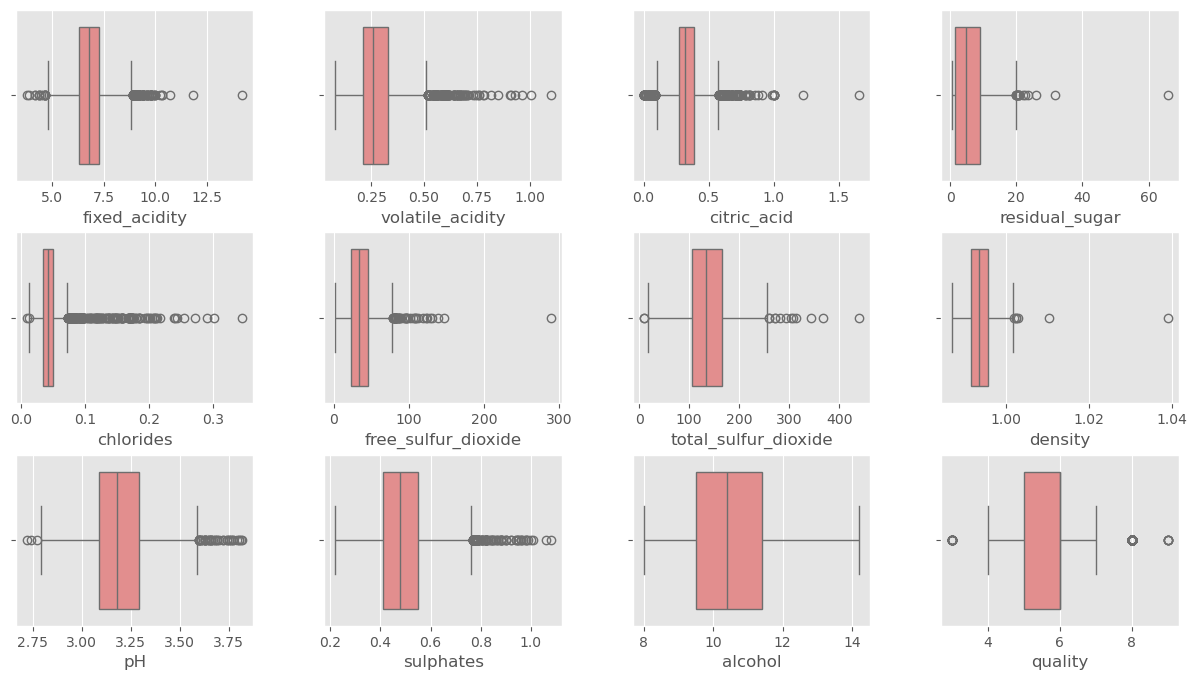

In [14]:
# Create boxplots for each feature

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns, plot by index
    sns.boxplot(x=df_white[feature], color='lightcoral')
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

* The dataset includes samples that have been rated by wine experts, so we aim to retain as many rows as possible.
* However, some features have extreme outliers, which can negatively impact the performance of the model.
* we will not touch outliers on this step since we will review them in detail after feature selection. 

# 2: Feature Selection<a id="2"></a>

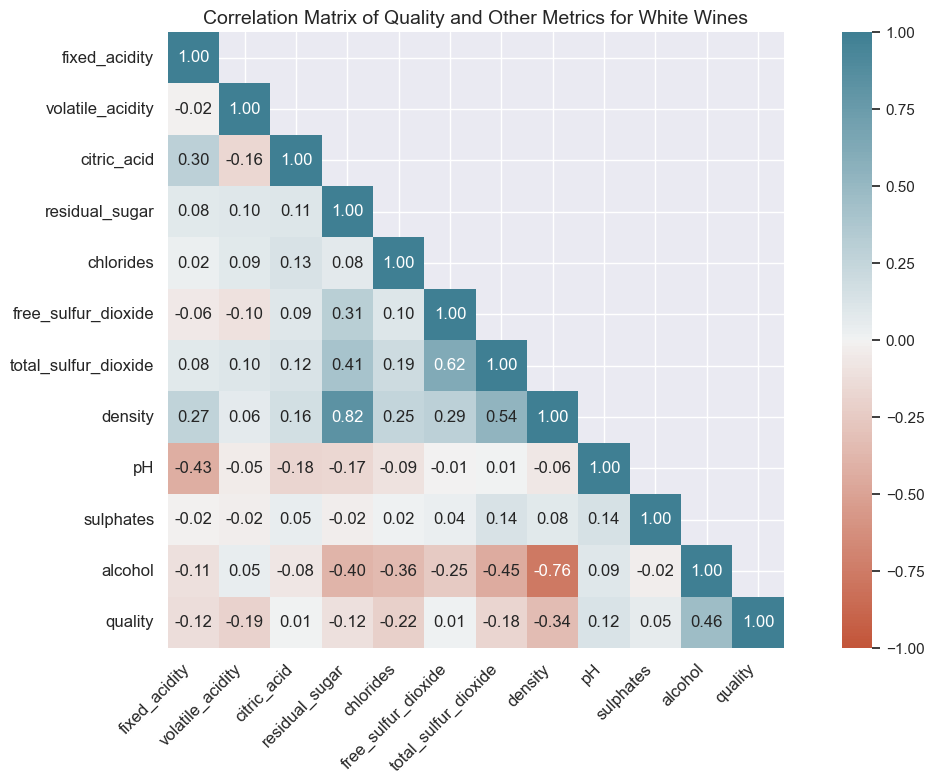

In [15]:
# create a heatmap to check relation between quality and other features

# Compute the correlation matrix

corr = df_white.corr(numeric_only=True)

# Create a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set the figure size and plot the heatmap with the mask

sns.set_theme(rc={'figure.figsize': (15, 8)})
ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200), square=True)

# Customize the tick labels and title

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Matrix of Quality and Other Metrics for White Wines', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

* The features showing the highest correlation with wine quality are:
    * alcohol: 0.46 
    * density: -0.34
    * chlorides: -0.22
    * volatile acidity: -0.19
    * total sulfur dioxide: -0.18
    
* Since alcohol and density are highly correlated with each other(-0.76), we will retain alcohol as it has a stronger individual correlation with quality.

In [16]:
# List of features

features = ['alcohol', 'chlorides', 'volatile_acidity',  'total_sulfur_dioxide', 'quality']

In [17]:
df_white_ml = df_white[features].reset_index(drop=True)

In [18]:
df_white_ml.describe()

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,10.589358,0.045905,0.280538,137.193512,5.854835
std,1.217076,0.023103,0.103437,43.129065,0.890683
min,8.000000,0.009000,0.080000,9.000000,3.000000
25%,9.500000,0.035000,0.210000,106.000000,5.000000
50%,10.400000,0.042000,0.260000,133.000000,6.000000
75%,11.400000,0.050000,0.330000,166.000000,6.000000
max,14.200000,0.346000,1.100000,440.000000,9.000000


In [19]:
skewness = df_white_ml[features].skew()
skewness

alcohol                 0.450697
chlorides               4.969076
volatile_acidity        1.641081
total_sulfur_dioxide    0.456800
quality                 0.112004
dtype: float64

In [20]:
kurtosis = df_white_ml[features].kurtosis()
kurtosis

alcohol                 -0.695980
chlorides               35.530288
volatile_acidity         5.327754
total_sulfur_dioxide     0.735258
quality                  0.299345
dtype: float64

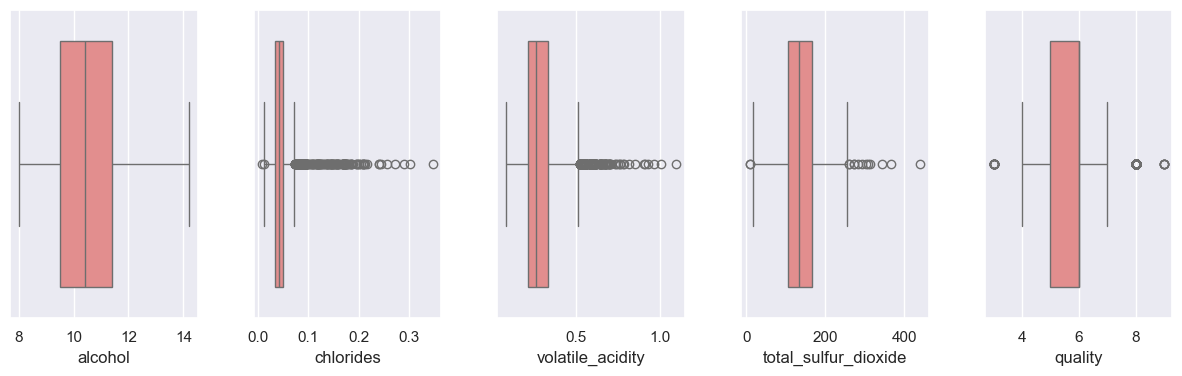

In [21]:
# Create boxplots for each feature

plt.figure(figsize=(15, 4))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 5, i)  # 1 row, 5 columns, plot by index
    sns.boxplot(x=df_white_ml[feature], color='lightcoral')

    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

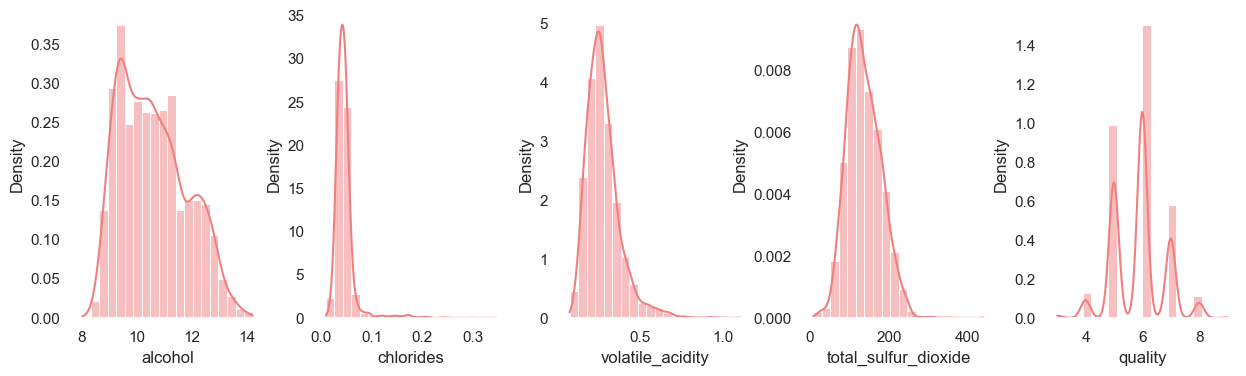

In [22]:
# check data distribution with histograms
 
plt.figure(figsize=(15, 4))

# Create histograms for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df_white_ml[feature], kde=True, bins=20, color='lightcoral', stat='density')
    
# Adjust space between plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Set white background for the figure and axes
plt.gcf().patch.set_facecolor('white')  # Set the background of the figure
for ax in plt.gcf().get_axes():
    ax.set_facecolor('white')  # Set the background for each subplot

plt.show()

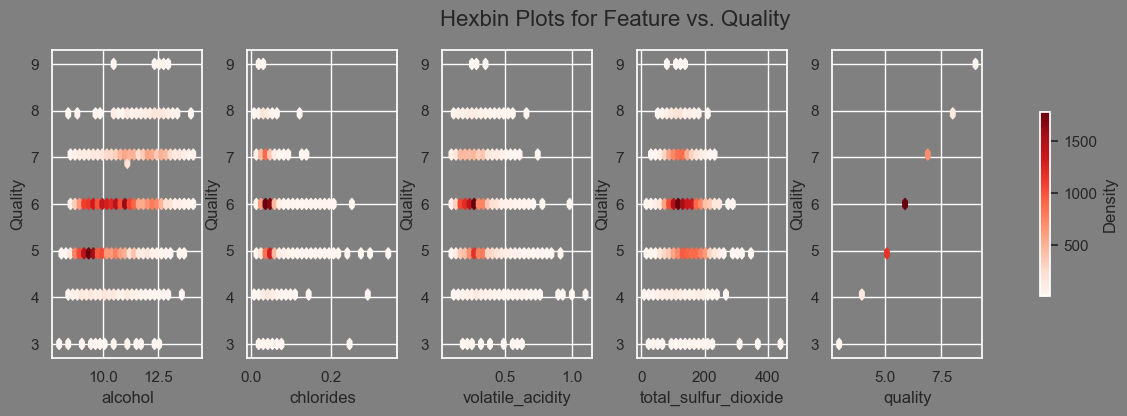

In [23]:
# Create hexbins to view data distribution in relation to quality

# Set up the figure for 1 row and 4 columns
fig, axs = plt.subplots(1, 5, figsize=(15, 4))
fig.suptitle("Hexbin Plots for Feature vs. Quality", fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Set background color for figure and subplots
fig.patch.set_facecolor('grey')
for ax in axs:
    ax.set_facecolor('grey')

# Plot hexbin for each feature
for ax, feature in zip(axs, features):
    hb = ax.hexbin(df_white_ml[feature], df_white_ml['quality'], gridsize=30, cmap='Reds', mincnt=1)
    ax.set_xlabel(feature)
    ax.set_ylabel('Quality')

# Add color bar
cbar = fig.colorbar(hb, ax=axs, shrink=0.6)
cbar.set_label('Density')

plt.show()

* alcohol: No action needed, values seem reasonable, majority of data between 9.5 and 11.4
* chlorides: Strong right skew, Max value of 0.346 is much higher than the 75th percentile, indicates extreme outliers but also has some extreme small values with min 0.009  
* volatile_acidity: Range: 0.08 to 1.1. most values between 0.21 and 0.33. max is notably higher than the 75th percentile
* total_sulfur_dioxide: The max of 440 is too high when i check quantiles, ndicates extreme high values, plots also show some concentration on small values. 
* I will check the values outside the 5th and 95th percentiles to deal with outliers and will likely remove them if they don't provide meaningful characteristics for the features.

### chloride outliers

In [24]:
df_white_ml['chlorides'].describe()

count    3961.000000
mean        0.045905
std         0.023103
min         0.009000
25%         0.035000
50%         0.042000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

In [25]:
df_white_ml['chlorides'].quantile(0.95)

0.069

In [26]:
df_white_ml['chlorides'].quantile(0.05)

0.027

In [27]:
df_filtered = df_white_ml[(df_white_ml['chlorides'] > 0.069) | (df_white_ml['chlorides'] < 0.027)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 18 to 3960
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               384 non-null    float64
 1   chlorides             384 non-null    float64
 2   volatile_acidity      384 non-null    float64
 3   total_sulfur_dioxide  384 non-null    float64
 4   quality               384 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 18.0 KB


In [28]:
df_filtered.head(50).T

,18,30,34,35,47,53,92,104,105,110,166,167,168,188,203,212,267,301,312,325,331,359,367,374,379,387,392,398,403,405,412,414,416,423,429,440,446,461,503,517,518,523,554,572,576,585,609,615,618,622
alcohol,9.300,12.80,9.400,9.400,9.100,8.600,8.800,9.800,11.000,10.60,9.10,9.100,9.100,9.100,11.400,9.800,9.100,9.600,10.800,10.800,12.200,9.200,12.900,9.10,12.900,8.900,12.500,9.200,9.600,9.700,11.400,12.500,12.500,8.80,11.200,9.200,9.300,11.300,9.40,9.000,9.000,9.100,9.200,9.40,9.00,11.100,12.40,9.400,11.100,10.800
chlorides,0.074,0.08,0.172,0.173,0.147,0.092,0.082,0.092,0.026,0.02,0.20,0.197,0.197,0.070,0.026,0.074,0.132,0.071,0.089,0.026,0.021,0.108,0.026,0.07,0.022,0.081,0.023,0.073,0.346,0.025,0.022,0.025,0.026,0.09,0.025,0.114,0.186,0.026,0.18,0.084,0.083,0.096,0.094,0.24,0.29,0.022,0.02,0.185,0.022,0.021
volatile_acidity,0.670,0.28,0.230,0.240,0.200,0.220,0.170,0.130,0.190,0.26,0.29,0.300,0.290,0.685,0.210,0.260,0.280,0.335,0.180,0.170,0.240,0.550,0.250,0.60,0.230,0.210,0.240,0.550,0.370,0.160,0.190,0.440,0.230,0.51,0.360,0.320,0.180,0.250,0.30,0.460,0.260,0.560,0.570,0.27,0.67,0.190,0.33,0.330,0.280,0.210
total_sulfur_dioxide,168.000,123.00,158.000,157.000,132.000,123.000,163.000,158.000,143.000,57.00,181.00,180.000,183.000,172.000,100.000,197.000,127.000,128.000,143.000,115.000,69.000,151.000,126.000,174.00,82.000,126.000,86.000,165.000,200.000,117.000,158.000,173.000,147.000,135.00,55.000,140.000,150.000,93.000,160.00,222.000,171.000,177.000,188.000,174.00,193.00,94.000,89.00,188.000,49.000,142.000
quality,5.000,5.00,6.000,6.000,6.000,6.000,6.000,6.000,6.000,5.00,5.00,6.000,5.000,6.000,7.000,3.000,6.000,6.000,6.000,7.000,6.000,4.000,8.000,5.00,7.000,5.000,6.000,6.000,5.000,6.000,6.000,6.000,6.000,5.00,6.000,6.000,5.000,7.000,6.00,5.000,5.000,4.000,4.000,5.00,4.00,6.000,8.00,5.000,7.000,7.000


In [29]:
df_filtered['quality'].value_counts()

quality
6    165
5    120
7     63
8     16
4     15
3      3
9      2
Name: count, dtype: int64

In [30]:
df_filtered[df_filtered['quality'] == 9]


,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality
688,12.4,0.021,0.36,85.0,9
732,12.7,0.018,0.36,119.0,9


In [31]:
df_filtered.sort_values(by='chlorides', ascending=True)

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality
3066,13.5,0.009,0.61,100.0,5
2174,11.7,0.012,0.28,100.0,7
3159,13.5,0.013,0.65,10.0,4
3064,12.0,0.014,0.27,143.0,4
2967,12.5,0.014,0.29,89.0,7
...,...,...,...,...,...
1570,10.2,0.255,0.36,142.0,6
3594,9.8,0.271,0.36,140.0,5
576,9.0,0.290,0.67,193.0,4
1028,9.2,0.301,0.61,220.0,5


* 5th percentile includes 2 of 5 high ranking as 9, there is a considerable negative correlation between chlorides and quality which makes sense considering the negative correlation 
* instead of 5th percentile 0.027, I will define the minimum value as 0.018 to keep the 2 white wines with quality value 9.  

In [32]:
df_filtered = df_white_ml[(df_white_ml['chlorides'] > 0.069) | (df_white_ml['chlorides'] < 0.018)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 18 to 3935
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               209 non-null    float64
 1   chlorides             209 non-null    float64
 2   volatile_acidity      209 non-null    float64
 3   total_sulfur_dioxide  209 non-null    float64
 4   quality               209 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 9.8 KB


In [33]:
df_filtered['quality'].mean()

5.454545454545454

In [34]:
df_white_ml['quality'].mean()

5.854834637717748

In [35]:
df_white_ml['chlorides'].describe()

count    3961.000000
mean        0.045905
std         0.023103
min         0.009000
25%         0.035000
50%         0.042000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

* 209 of 3961 samples in data set(around 4%) will be removed. The quality distribution is fairly balanced, with an average quality 5.45, slightly lower than the overall average for all white wines 5.85. 

In [36]:
df_white_ml = df_white_ml[(df_white_ml['chlorides'] <= 0.069) & (df_white_ml['chlorides'] >= 0.018)].reset_index(drop=True)
df_white_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               3752 non-null   float64
 1   chlorides             3752 non-null   float64
 2   volatile_acidity      3752 non-null   float64
 3   total_sulfur_dioxide  3752 non-null   float64
 4   quality               3752 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 146.7 KB


In [37]:
df_white_ml['chlorides'].describe()

count    3752.000000
mean        0.042098
std         0.009695
min         0.018000
25%         0.035000
50%         0.042000
75%         0.049000
max         0.069000
Name: chlorides, dtype: float64

In [38]:
df_white_ml['chlorides'].skew()

0.15328670967948368

In [39]:
df_white_ml['chlorides'].kurtosis()

-0.2768626683841058

In [40]:
df_white_ml['quality'].mean()

5.877132196162047

* The mean decreased slightly from 0.045 to 0.042
* Standard deviation was reduced significantly from 0.023 to 0.009
* The kurtosis dropped to a slight negative value (-0.27), now indicating a more uniform, platykurtic distribution with no extreme tails.
* Skewness reduced to 0.15, which is close to a normal distribution.

## volatile_acidity outliers

* volatile acidity is caused by bacterial spoilage, producing acetic acid, which can lead to serious faults in the wine. 
* Legal limits for volatile acidity reach up to 1.2 g/L in white wines. source: https://enology.umn.edu/news/volatile-acidity-wine-making 

In [41]:
df_white_ml['volatile_acidity'].describe()

count    3752.000000
mean        0.277849
std         0.101043
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile_acidity, dtype: float64

In [42]:
df_white_ml['volatile_acidity'].quantile(0.95)

0.46

In [43]:
df_white_ml['volatile_acidity'].quantile(0.05)

0.15

In [44]:
df_filtered = df_white_ml[(df_white_ml['volatile_acidity'] > 0.46) | (df_white_ml['volatile_acidity'] < 0.15)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 12 to 3737
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               312 non-null    float64
 1   chlorides             312 non-null    float64
 2   volatile_acidity      312 non-null    float64
 3   total_sulfur_dioxide  312 non-null    float64
 4   quality               312 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 14.6 KB


In [45]:
df_filtered.head(50).T

,12,13,25,27,48,62,80,83,89,91,117,137,143,153,161,167,171,178,182,186,206,212,213,214,215,217,235,250,257,258,280,285,300,314,326,327,351,369,380,403,412,422,447,474,502,514,529,566,606,607
alcohol,9.600,12.800,10.200,9.000,10.500,9.00,9.400,9.200,9.700,11.800,9.000,11.400,8.70,12.700,9.60,10.20,9.700,10.400,8.900,9.600,10.200,9.700,9.700,9.700,9.700,9.000,8.500,12.500,10.100,10.300,9.600,11.400,10.000,10.200,9.400,10.300,9.300,9.400,9.200,12.000,10.80,9.700,9.100,10.800,10.800,9.000,10.000,9.200,9.800,9.800
chlorides,0.046,0.029,0.042,0.045,0.035,0.06,0.054,0.051,0.065,0.035,0.058,0.037,0.06,0.034,0.05,0.04,0.051,0.046,0.062,0.044,0.048,0.043,0.044,0.045,0.044,0.057,0.066,0.032,0.040,0.041,0.050,0.044,0.048,0.031,0.049,0.044,0.048,0.039,0.043,0.039,0.05,0.048,0.066,0.030,0.027,0.050,0.047,0.044,0.051,0.047
volatile_acidity,0.480,0.660,0.140,0.120,0.470,0.54,0.120,0.130,0.485,0.140,0.595,0.480,0.67,0.530,0.54,0.57,0.130,0.495,0.640,0.520,0.115,0.580,0.585,0.590,0.600,0.580,0.590,0.550,0.125,0.100,0.145,0.120,0.905,0.550,0.490,0.140,0.520,0.140,0.470,0.620,0.13,0.100,0.510,0.475,0.140,0.105,0.140,0.470,0.140,0.130
total_sulfur_dioxide,99.000,75.000,47.000,117.000,151.000,105.00,162.000,109.000,103.000,85.000,97.000,100.000,108.00,109.000,236.00,77.00,122.000,140.000,142.000,221.000,108.000,149.000,145.000,147.000,147.000,123.000,182.000,164.000,69.000,65.000,131.000,146.000,204.000,125.000,125.000,116.000,245.000,141.000,172.000,152.000,78.00,103.000,165.000,131.000,140.000,146.000,173.000,98.000,136.000,134.000
quality,6.000,8.000,6.000,6.000,5.000,5.00,5.000,6.000,4.000,6.000,4.000,4.000,4.00,8.000,5.00,5.00,6.000,6.000,4.000,6.000,6.000,5.000,6.000,6.000,5.000,5.000,3.000,8.000,6.000,7.000,6.000,7.000,5.000,6.000,5.000,6.000,6.000,6.000,5.000,6.000,6.00,6.000,5.000,5.000,6.000,6.000,6.000,5.000,7.000,7.000


In [46]:
df_filtered['quality'].mean()

5.727564102564102

In [47]:
df_white_ml['quality'].mean()

5.877132196162047

In [48]:
df_white_ml['quality'].value_counts()

quality
6    1707
5    1076
7     678
4     140
8     128
3      18
9       5
Name: count, dtype: int64

In [49]:
df_filtered['quality'].value_counts()

quality
6    120
5     84
7     57
4     35
8     12
3      4
Name: count, dtype: int64

* 312 of 3752 samples have volatile acidity values are not between 5th and the 95th percentile. 
* The average quality of these samples is 5.72 which is close to current average 5.87.
* I will remove the rows that fall outside these percentiles to create a more refined and balanced dataset for the ML model. 

In [50]:
df_white_ml = df_white_ml[(df_white_ml['volatile_acidity'] <= 0.46) & (df_white_ml['volatile_acidity'] >= 0.15)].reset_index(drop=True)
df_white_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               3440 non-null   float64
 1   chlorides             3440 non-null   float64
 2   volatile_acidity      3440 non-null   float64
 3   total_sulfur_dioxide  3440 non-null   float64
 4   quality               3440 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 134.5 KB


In [51]:
df_white_ml['volatile_acidity'].describe()

count    3440.000000
mean        0.269286
std         0.071567
min         0.150000
25%         0.210000
50%         0.260000
75%         0.320000
max         0.460000
Name: volatile_acidity, dtype: float64

In [52]:
df_white_ml['volatile_acidity'].skew()

0.5126691426818939

In [53]:
df_white_ml['volatile_acidity'].kurtosis()

-0.28823615133752956

* the volatile_acidity feature is now more normally distributed

## total_sulfur_dioxide outliers

In [54]:
df_white_ml['total_sulfur_dioxide'].describe()

count    3440.000000
mean      137.827616
std        42.615286
min        18.000000
25%       107.000000
50%       133.000000
75%       167.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64

In [55]:
df_white_ml['total_sulfur_dioxide'].quantile(0.95)

212.0

In [56]:
df_white_ml['total_sulfur_dioxide'].quantile(0.05)

74.0

In [57]:
df_filtered = df_white_ml[(df_white_ml['chlorides'] > 0.069) | (df_white_ml['chlorides'] < 0.027)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 87 to 3439
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               163 non-null    float64
 1   chlorides             163 non-null    float64
 2   volatile_acidity      163 non-null    float64
 3   total_sulfur_dioxide  163 non-null    float64
 4   quality               163 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.6 KB


In [58]:
df_filtered = df_white_ml[(df_white_ml['total_sulfur_dioxide'] > 212) | (df_white_ml['total_sulfur_dioxide'] < 74)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 6 to 3429
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               333 non-null    float64
 1   chlorides             333 non-null    float64
 2   volatile_acidity      333 non-null    float64
 3   total_sulfur_dioxide  333 non-null    float64
 4   quality               333 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.6 KB


In [59]:
df_filtered['quality'].value_counts()

quality
6    151
5    125
7     26
4     23
3      5
8      3
Name: count, dtype: int64

In [60]:
df_filtered[df_filtered['quality'] == 3]

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality
316,11.5,0.038,0.32,66.0,3
543,12.6,0.022,0.39,19.0,3
634,9.6,0.037,0.17,33.0,3
1223,9.4,0.041,0.25,216.0,3
3327,10.5,0.047,0.26,440.0,3


In [61]:
df_white_ml['quality'].value_counts()

quality
6    1587
5     992
7     621
8     116
4     105
3      14
9       5
Name: count, dtype: int64

In [62]:
df_white_ml[df_white_ml['quality'] == 3]

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality
180,11.7,0.029,0.240,109.0,3
316,11.5,0.038,0.320,66.0,3
543,12.6,0.022,0.390,19.0,3
634,9.6,0.037,0.170,33.0,3
893,12.4,0.033,0.330,96.0,3
1072,9.1,0.053,0.320,134.0,3
1223,9.4,0.041,0.250,216.0,3
1473,9.7,0.034,0.230,123.0,3
2184,10.1,0.041,0.200,201.0,3
2313,8.0,0.041,0.215,157.0,3


In [63]:
df_white_ml[df_white_ml['quality'] == 4]

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality
32,9.80,0.063,0.450,206.0,4
72,10.10,0.038,0.360,83.0,4
129,12.60,0.044,0.320,65.0,4
140,8.90,0.047,0.280,210.0,4
148,10.20,0.053,0.280,114.0,4
...,...,...,...,...,...
3136,9.55,0.058,0.280,108.0,4
3153,11.50,0.034,0.260,129.0,4
3349,11.20,0.045,0.240,132.0,4
3366,12.10,0.033,0.350,65.0,4


In [64]:
df_filtered['quality'].mean()

5.5375375375375375

* I hesitated to remove these outliers because 5 out of 14 entries had a quality value of 3, and approximately 25% of the entries had a quality value of 4.
* However, the distribution of the quality values is quite inconsistent, so I will proceed by removing values outside the 5th and 95th percentiles.

In [65]:
df_white_ml = df_white_ml[(df_white_ml['total_sulfur_dioxide'] <= 212) & (df_white_ml['total_sulfur_dioxide'] >= 74)].reset_index(drop=True)
df_white_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               3107 non-null   float64
 1   chlorides             3107 non-null   float64
 2   volatile_acidity      3107 non-null   float64
 3   total_sulfur_dioxide  3107 non-null   float64
 4   quality               3107 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 121.5 KB


In [66]:
df_white_ml.head()

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality
0,8.8,0.045,0.27,170.0,6
1,9.5,0.049,0.30,132.0,6
2,10.1,0.050,0.28,97.0,6
3,9.9,0.058,0.23,186.0,6
4,9.6,0.045,0.32,136.0,6


In [67]:
df_white_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,3107.0,10.661725,1.197871,8.000,9.700,10.500,11.500,14.200
chlorides,3107.0,0.042132,0.009676,0.018,0.035,0.042,0.049,0.069
volatile_acidity,3107.0,0.268225,0.071239,0.150,0.210,0.260,0.310,0.460
total_sulfur_dioxide,3107.0,136.794979,34.163052,74.000,110.000,133.000,163.000,212.000
quality,3107.0,5.928548,0.870223,3.000,5.000,6.000,6.000,9.000


In [68]:
df_white_ml['total_sulfur_dioxide'].skew()

0.2497089004877891

In [69]:
df_white_ml['total_sulfur_dioxide'].kurtosis()

-0.8551844931716293

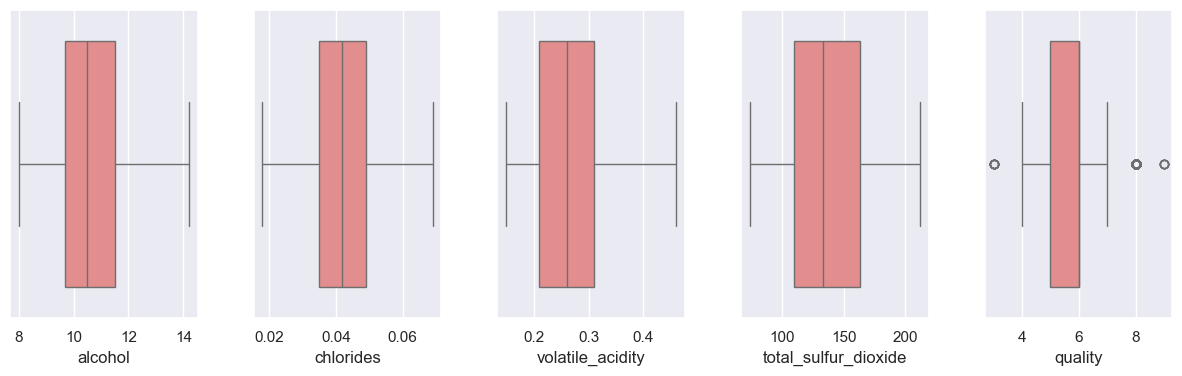

In [70]:
# Create boxplots for each feature

plt.figure(figsize=(15, 4))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 5, i)  # 1 row, 5 columns, plot by index
    sns.boxplot(x=df_white_ml[feature], color='lightcoral')

    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

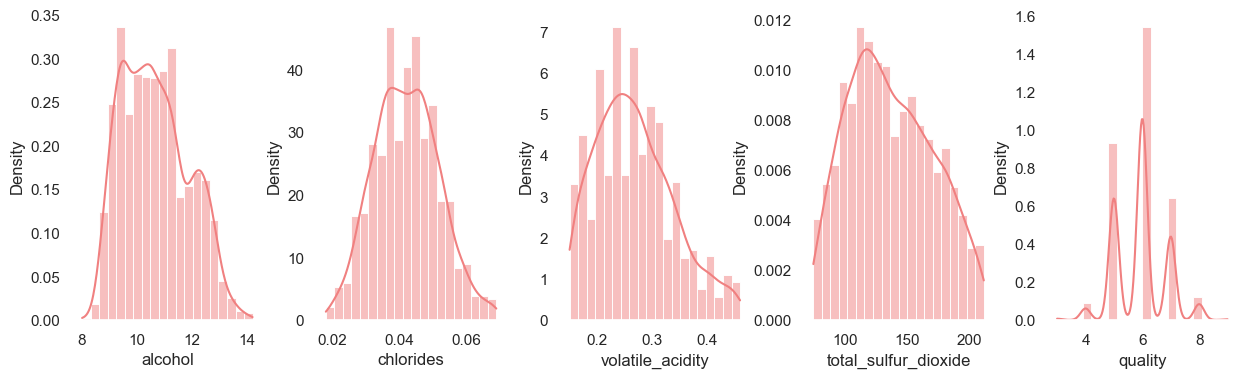

In [71]:
plt.figure(figsize=(15, 4))

# Create histograms for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df_white_ml[feature], kde=True, bins=20, color='lightcoral', stat='density')
    
# Adjust space between plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Set white background for the figure and axes
plt.gcf().patch.set_facecolor('white')  # Set the background of the figure
for ax in plt.gcf().get_axes():
    ax.set_facecolor('white')  # Set the background for each subplot

plt.show()

* A total of 854 out of 3,961 entries were removed, which is approximately 21.6% of all entries. This was done to create a more refined and balanced dataset for the ML model, reducing the influence of extreme outliers.
* 21% of all entries being removed is much more than I expected, especially considering my intention was to retain as many samples as possible since they were evaluated by wine experts, anyway it is the final features and entries in the end. 

# 3: Scaling, Preprocessing, Train-Test Split<a id="3"></a>

* In this step, we will create a new feature called quality_label to categorize the quality rankings of wine (from 3 to 9) into three groups: low, medium, and high. The breakdown will be as follows:

    Scores of 3, 4, and 5 will be labeled as 0 (low quality).
    Scores of 6 and 7 will be labeled as 1 (medium quality).
    Scores of 8 and 9 will be labeled as 2 (high quality).

* This categorization will help improve the model's performance by simplifying the target variable.

In [72]:
# Create a 'quality_label' column to categorize wine quality

df_white_ml['quality_label'] = df_white_ml['quality'].apply(lambda x: 0 if x in [3, 4, 5] else (1 if x in [6, 7] else 2))


In [73]:
df_white_ml

,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide,quality,quality_label
0,8.8,0.045,0.27,170.0,6,1
1,9.5,0.049,0.30,132.0,6,1
2,10.1,0.050,0.28,97.0,6,1
3,9.9,0.058,0.23,186.0,6,1
4,9.6,0.045,0.32,136.0,6,1
...,...,...,...,...,...,...
3102,11.2,0.039,0.21,92.0,6,1
3103,9.6,0.047,0.32,168.0,5,0
3104,9.4,0.041,0.24,111.0,6,1
3105,12.8,0.022,0.29,110.0,7,1


In [74]:
df_white_ml['quality_label'].value_counts()

quality_label
1    2031
0     958
2     118
Name: count, dtype: int64

### Feature Scaling

In [75]:
# Select the features (exclude 'quality_label' as it's the target)
X = df_white_ml[['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide']]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features for scaling
scaled_features = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame for convenience (optional)
scaled_df = pd.DataFrame(scaled_features, columns=['alcohol', 'chlorides', 'volatile_acidity', 'total_sulfur_dioxide'])

scaled_df


,alcohol,chlorides,volatile_acidity,total_sulfur_dioxide
0,-1.554445,0.296443,0.024920,0.972114
1,-0.969981,0.709886,0.446103,-0.140378
2,-0.469012,0.813246,0.165315,-1.165042
3,-0.636002,1.640132,-0.536657,1.440531
4,-0.886486,0.296443,0.726892,-0.023274
...,...,...,...,...
3102,0.449432,-0.323722,-0.817445,-1.311422
3103,-0.886486,0.503164,0.726892,0.913561
3104,-1.053476,-0.117000,-0.396262,-0.755176
3105,1.785350,-2.080854,0.305709,-0.784453
